In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.tools.plotting import scatter_matrix
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn import metrics
from sklearn import preprocessing
from sklearn.grid_search import GridSearchCV
from sklearn import neighbors, tree, naive_bayes
from sklearn.lda import LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import decomposition
from datetime import datetime

In [2]:
water = pd.read_csv("C:/datasets/water_training_data.csv")


In [3]:
watertest = pd.read_csv("C:/datasets/water_test_data.csv")

In [4]:
water_target = pd.read_csv("C:/datasets/water_training_labels.csv")

In [5]:
water_target.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [6]:
water_target = water_target.drop('id', 1)

In [7]:
water_target.head()

,status_group
0,functional
1,functional
2,functional
3,non functional
4,functional


In [8]:
pd.set_option('display.max_columns', None)
water.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [9]:
water.shape

(59400, 40)

In [10]:
water.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,59400,NaN,NaN,NaN,37115.13,21453.13,0,18519.75,37061.5,55656.5,74247
amount_tsh,59400,NaN,NaN,NaN,317.6504,2997.575,0,0,0,20,350000
date_recorded,59400,356,2011-03-15,572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
funder,55765,1897,Government Of Tanzania,9084,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gps_height,59400,NaN,NaN,NaN,668.2972,693.1164,-90,0,369,1319.25,2770
installer,55745,2145,DWE,17402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longitude,59400,NaN,NaN,NaN,34.07743,6.567432,0,33.09035,34.90874,37.17839,40.34519
latitude,59400,NaN,NaN,NaN,-5.706033,2.946019,-11.64944,-8.540621,-5.021597,-3.326156,-2e-08
wpt_name,59400,37400,none,3563,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_private,59400,NaN,NaN,NaN,0.4741414,12.23623,0,0,0,0,1776


In [11]:
water.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [13]:
water['date_recorded'] = pd.to_datetime(water['date_recorded'])
water['date_recorded'].head(5)

0   2011-03-14
1   2013-03-06
2   2013-02-25
3   2013-01-28
4   2011-07-13
Name: date_recorded, dtype: datetime64[ns]

In [14]:
maxdate = datetime.strptime('2013-12-13', "%Y-%m-%d").date()
maxdate

datetime.date(2013, 12, 13)

In [15]:
water['days_from_20131213']=(maxdate-water['date_recorded'])

In [16]:
water['days_frm_20131213']=water['days_from_20131213'].apply(lambda x: x / np.timedelta64(1,'D'))
#apply(lambda x: calculate_age(x, today))

In [17]:
water['Month_Recorded']=water['date_recorded'].dt.month
water['Month_Recorded']=water['Month_Recorded'].astype(str)
water['Month_Recorded'].head(5)

0    3
1    3
2    2
3    1
4    7
Name: Month_Recorded, dtype: object

In [18]:
#water['Mnth_Recorded']=pd.to_datetime(water['date_recorded2'],format="%B")

In [19]:
water.head(5)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,days_from_20131213,days_frm_20131213,Month_Recorded
0,69572,6000,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,1005 days,1005,3
1,8776,0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,282 days,282,3
2,34310,25,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,291 days,291,2
3,67743,0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,319 days,319,1
4,19728,0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,884 days,884,7


In [20]:
#drop certain variables
water = water.drop('id', 1)
water = water.drop('date_recorded',1)
water = water.drop('days_from_20131213',1)

Since there are 1897 levels for the variable "funder", and the distribution drops off very quickly,
let's keep only the top 15 (i.e. those who funded >700 wells), and make all the rest "Other"

In [21]:
#REDUCE LEVELS FOR CATEGORICAL VARIABLES

In [22]:
water["funder"].value_counts()

Government Of Tanzania         9084
Danida                         3114
Hesawa                         2202
Rwssp                          1374
World Bank                     1349
Kkkt                           1287
World Vision                   1246
Unicef                         1057
Tasaf                           877
District Council                843
Dhv                             829
Private Individual              826
Dwsp                            811
0                               777
Norad                           765
Germany Republi                 610
Tcrs                            602
Ministry Of Water               590
Water                           583
Dwe                             484
Netherlands                     470
Hifab                           450
Adb                             448
Lga                             442
Amref                           425
Fini Water                      393
Oxfam                           359
Wateraid                    

In [23]:
#water["funder"].value_counts()
sizes = water["funder"].value_counts()
bad = sizes.index[sizes < 700]
water.loc[water["funder"].isin(bad), "funder"] = "Other"
#replace missing "funder" values with "Other"
water.funder.fillna("Other", axis=0, inplace=True)

In [24]:
water["funder"].value_counts()

Other                     32959
Government Of Tanzania     9084
Danida                     3114
Hesawa                     2202
Rwssp                      1374
World Bank                 1349
Kkkt                       1287
World Vision               1246
Unicef                     1057
Tasaf                       877
District Council            843
Dhv                         829
Private Individual          826
Dwsp                        811
0                           777
Norad                       765
dtype: int64

In [25]:
water.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
amount_tsh,59400,NaN,NaN,NaN,317.6504,2997.575,0,0,0,20,350000
funder,59400,16,Other,32959,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gps_height,59400,NaN,NaN,NaN,668.2972,693.1164,-90,0,369,1319.25,2770
installer,55745,2145,DWE,17402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longitude,59400,NaN,NaN,NaN,34.07743,6.567432,0,33.09035,34.90874,37.17839,40.34519
latitude,59400,NaN,NaN,NaN,-5.706033,2.946019,-11.64944,-8.540621,-5.021597,-3.326156,-2e-08
wpt_name,59400,37400,none,3563,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_private,59400,NaN,NaN,NaN,0.4741414,12.23623,0,0,0,0,1776
basin,59400,9,Lake Victoria,10248,NaN,NaN,NaN,NaN,NaN,NaN,NaN
subvillage,59029,19287,Madukani,508,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
water["installer"].value_counts()

DWE                          17402
Government                    1825
RWE                           1206
Commu                         1060
DANIDA                        1050
KKKT                           898
Hesawa                         840
0                              777
TCRS                           707
Central government             622
CES                            610
Community                      553
DANID                          552
District Council               551
HESAWA                         539
World vision                   408
LGA                            408
WEDECO                         397
TASAF                          396
District council               392
Gover                          383
AMREF                          329
TWESA                          316
WU                             301
Dmdd                           287
ACRA                           278
World Vision                   270
SEMA                           249
DW                  

In [27]:
sizes = water["installer"].value_counts()
bad = sizes.index[sizes < 500]
water.loc[water["installer"].isin(bad), "installer"] = "Other"
#replace missing "installer" values with "Other"
water.installer.fillna("Other", axis=0, inplace=True)

In [28]:
water["installer"].value_counts()

Other                 30208
DWE                   17402
Government             1825
RWE                    1206
Commu                  1060
DANIDA                 1050
KKKT                    898
Hesawa                  840
0                       777
TCRS                    707
Central government      622
CES                     610
Community               553
DANID                   552
District Council        551
HESAWA                  539
dtype: int64

In [29]:
water.describe(include="all").T
#scheme_name

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
amount_tsh,59400,NaN,NaN,NaN,317.6504,2997.575,0,0,0,20,350000
funder,59400,16,Other,32959,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gps_height,59400,NaN,NaN,NaN,668.2972,693.1164,-90,0,369,1319.25,2770
installer,59400,16,Other,30208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longitude,59400,NaN,NaN,NaN,34.07743,6.567432,0,33.09035,34.90874,37.17839,40.34519
latitude,59400,NaN,NaN,NaN,-5.706033,2.946019,-11.64944,-8.540621,-5.021597,-3.326156,-2e-08
wpt_name,59400,37400,none,3563,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_private,59400,NaN,NaN,NaN,0.4741414,12.23623,0,0,0,0,1776
basin,59400,9,Lake Victoria,10248,NaN,NaN,NaN,NaN,NaN,NaN,NaN
subvillage,59029,19287,Madukani,508,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#drop variables with too many levels, or those that are redundant
water = water.drop('wpt_name', 1)
water = water.drop('num_private',1)
water = water.drop('subvillage',1)
water = water.drop('region_code',1)
water = water.drop('district_code',1)
water = water.drop('lga',1)
water = water.drop('ward',1)
water = water.drop('recorded_by',1)
water = water.drop('scheme_name',1)

In [31]:
water.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
amount_tsh,59400,NaN,NaN,NaN,317.6504,2997.575,0,0,0,20,350000
funder,59400,16,Other,32959,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gps_height,59400,NaN,NaN,NaN,668.2972,693.1164,-90,0,369,1319.25,2770
installer,59400,16,Other,30208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longitude,59400,NaN,NaN,NaN,34.07743,6.567432,0,33.09035,34.90874,37.17839,40.34519
latitude,59400,NaN,NaN,NaN,-5.706033,2.946019,-11.64944,-8.540621,-5.021597,-3.326156,-2e-08
basin,59400,9,Lake Victoria,10248,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,59400,21,Iringa,5294,NaN,NaN,NaN,NaN,NaN,NaN,NaN
population,59400,NaN,NaN,NaN,179.91,471.4822,0,0,25,215,30500
public_meeting,56066,2,True,51011,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
#Construction Year
water['Construction_Year_Str']=water['construction_year'].astype(str)

In [34]:
water["Construction_Year_Str"].value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
dtype: int64

In [35]:
sizes = water["Construction_Year_Str"].value_counts()
bad = sizes.index[sizes < 970]
water.loc[water["Construction_Year_Str"].isin(bad), "Construction_Year_Str"] = "Other"
#replace missing "installer" values with "Other"
#water.installer.fillna("Other", axis=0, inplace=True)

In [36]:
water["Construction_Year_Str"].value_counts()

0        20709
Other    15886
2010      2645
2008      2613
2009      2533
2000      2091
2007      1587
2006      1471
2003      1286
2011      1256
2004      1123
2012      1084
2002      1075
1978      1037
1995      1014
2005      1011
1999       979
dtype: int64

In [37]:
sizes = water["Construction_Year_Str"].value_counts()
bad = sizes.index[sizes > 2645]
water.loc[water["Construction_Year_Str"].isin(bad), "Construction_Year_Str"] = "Other"
#replace missing "installer" values with "Other"
#water.installer.fillna("Other", axis=0, inplace=True)

In [38]:
water["Construction_Year_Str"].value_counts()

Other    36595
2010      2645
2008      2613
2009      2533
2000      2091
2007      1587
2006      1471
2003      1286
2011      1256
2004      1123
2012      1084
2002      1075
1978      1037
1995      1014
2005      1011
1999       979
dtype: int64

In [39]:
#drop construction year
water = water.drop('construction_year', 1)

In [40]:
water.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
amount_tsh,59400,NaN,NaN,NaN,317.6504,2997.575,0,0,0,20,350000
funder,59400,16,Other,32959,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gps_height,59400,NaN,NaN,NaN,668.2972,693.1164,-90,0,369,1319.25,2770
installer,59400,16,Other,30208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longitude,59400,NaN,NaN,NaN,34.07743,6.567432,0,33.09035,34.90874,37.17839,40.34519
latitude,59400,NaN,NaN,NaN,-5.706033,2.946019,-11.64944,-8.540621,-5.021597,-3.326156,-2e-08
basin,59400,9,Lake Victoria,10248,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,59400,21,Iringa,5294,NaN,NaN,NaN,NaN,NaN,NaN,NaN
population,59400,NaN,NaN,NaN,179.91,471.4822,0,0,25,215,30500
public_meeting,56066,2,True,51011,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
#test data
watertest.shape

(14850, 40)

In [42]:
watertest.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [43]:
#test data
watertest.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,14850,NaN,NaN,NaN,37161.97,21359.36,10,18727,37361.5,55799.75,74249
amount_tsh,14850,NaN,NaN,NaN,322.827,2510.969,0,0,0,25,200000
date_recorded,14850,331,2013-02-03,138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
funder,13981,980,Government Of Tanzania,2215,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gps_height,14850,NaN,NaN,NaN,655.1476,691.2612,-57,0,344,1308,2777
installer,13973,1091,DWE,4349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longitude,14850,NaN,NaN,NaN,34.06161,6.593034,0,33.06945,34.90121,37.19659,40.32502
latitude,14850,NaN,NaN,NaN,-5.684724,2.940803,-11.56459,-8.44397,-5.04975,-3.320594,-2e-08
wpt_name,14850,10840,none,877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_private,14850,NaN,NaN,NaN,0.4150842,8.16791,0,0,0,0,669


In [44]:
#change date recorded
watertest['date_recorded'] = pd.to_datetime(watertest['date_recorded'])

In [45]:
#from datetime import datetime
maxdate = datetime.strptime('2013-12-13', "%Y-%m-%d").date()

In [46]:
watertest['days_from_20131213']=(maxdate-watertest['date_recorded'])
watertest['days_frm_20131213']=watertest['days_from_20131213'].apply(lambda x: x / np.timedelta64(1,'D'))
#apply(lambda x: calculate_age(x, today))

In [47]:
watertest['Month_Recorded']=watertest['date_recorded'].dt.month

In [48]:
watertest['Month_Recorded']=watertest['Month_Recorded'].astype(str)

In [49]:
watertest['Month_Recorded'].head(5)

0    2
1    2
2    2
3    1
4    3
Name: Month_Recorded, dtype: object

In [50]:
test_id=watertest['id']

In [51]:
watertest.head(10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,days_from_20131213,days_frm_20131213,Month_Recorded
0,50785,0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other,312 days,312,2
1,51630,0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,312 days,312,2
2,17168,0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other,315 days,315,2
3,45559,0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other,325 days,325,1
4,49871,500,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,261 days,261,3
5,52449,0,2013-03-04,Government Of Tanzania,1685,DWE,36.685279,-3.302420,Masaga,0,Pangani,Masaga,Arusha,2,2,Arusha Rural,Ilkiding'a,200,True,GeoData Consultants Ltd,VWC,Timbolo sambasha TPRI pipe line,True,1990,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,284 days,284,3
6,24806,0,2011-03-02,Government Of Tanzania,550,Gover,36.398041,-7.541382,none,0,Rufiji,Kichangani,Iringa,11,7,Kilolo,Mahenge,600,True,GeoData Consultants Ltd,VWC,NaN,True,2007,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,salty,salty,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,1017 days,1017,3
7,28965,0,2013-01-25,Finw,234,FinW,39.607420,-10.893786,Kwa Mkwaa,0,Ruvuma / Southern Coast,Ilala,Mtwara,9,4,Tandahimba,Maundo,1,True,GeoData Consultants Ltd,Water Board,Borehole,True,1982,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,322 days,322,1
8,36301,30,2013-01-23,Unicef,584,LGA,39.262951,-10.823588,Kwa Mzee Mpini,0,Ruvuma / Southern Coast,Bondeni,Mtwara,90,33,Newala,Mnekachi,40,True,GeoData Consultants Ltd,VWC,MWS,False,1997,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,324 days,324,1
9,54122,0,2013-03-18,Lawatefuka Water Supply,1083,Lawatefuka water sup,37.096108,-3.251754,Kwa Flora Daud,0,Pangani,Donyomuruak,Kilimanjaro,3,7,Siha,Siha Kati,1,True,GeoData Consultants Ltd,Water Board,BL Erasto Laizer,True,2003,gravity,gravity,gravity,water b

In [52]:
#drop variables
watertest = watertest.drop('id', 1)
watertest = watertest.drop('date_recorded',1)
watertest = watertest.drop('days_from_20131213',1)

In [53]:
#watertest.funder
watertest["funder"].value_counts()

Government Of Tanzania         2215
Danida                          793
Hesawa                          580
World Bank                      352
Kkkt                            336
Rwssp                           329
World Vision                    316
Unicef                          267
Tasaf                           259
Dhv                             236
Private Individual              208
0                               203
Dwsp                            201
District Council                194
Norad                           184
Water                           156
Germany Republi                 155
Ministry Of Water               138
Tcrs                            133
Hifab                           127
Netherlands                     122
Dwe                             121
Lga                             104
Adb                             103
Amref                           100
Rc Church                        89
Private                          85
Wateraid                    

In [54]:
#water["funder"].value_counts()
sizes = watertest["funder"].value_counts()
bad = sizes.index[sizes < 180]
watertest.loc[watertest["funder"].isin(bad), "funder"] = "Other"
#replace missing "funder" values with "Other"
watertest.funder.fillna("Other", axis=0, inplace=True)

In [55]:
#watertest.funder
watertest["funder"].value_counts()

Other                     8177
Government Of Tanzania    2215
Danida                     793
Hesawa                     580
World Bank                 352
Kkkt                       336
Rwssp                      329
World Vision               316
Unicef                     267
Tasaf                      259
Dhv                        236
Private Individual         208
0                          203
Dwsp                       201
District Council           194
Norad                      184
dtype: int64

In [56]:
watertest["installer"].value_counts()

DWE                              4349
Government                        457
RWE                               292
Commu                             287
DANIDA                            255
Hesawa                            230
KKKT                              222
0                                 203
TCRS                              180
CES                               155
Central government                142
HESAWA                            140
DANID                             138
Community                         134
District Council                  112
World vision                      109
TASAF                             108
Gover                             100
WEDECO                             99
District council                   98
LGA                                93
TWESA                              79
WU                                 76
AMREF                              69
Dmdd                               69
ACRA                               68
UNICEF      

In [57]:
sizes = watertest["installer"].value_counts()
bad = sizes.index[sizes < 110]
watertest.loc[watertest["installer"].isin(bad), "installer"] = "Other"
#replace missing "installer" values with "Other"
watertest.installer.fillna("Other", axis=0, inplace=True)

In [58]:
watertest["installer"].value_counts()

Other                 7554
DWE                   4349
Government             457
RWE                    292
Commu                  287
DANIDA                 255
Hesawa                 230
KKKT                   222
0                      203
TCRS                   180
CES                    155
Central government     142
HESAWA                 140
DANID                  138
Community              134
District Council       112
dtype: int64

In [59]:
#drop variables with too many levels, or those that are redundant
watertest = watertest.drop('wpt_name', 1)
watertest = watertest.drop('num_private',1)
watertest = watertest.drop('subvillage',1)
watertest = watertest.drop('region_code',1)
watertest = watertest.drop('district_code',1)
watertest = watertest.drop('lga',1)
watertest = watertest.drop('ward',1)
watertest = watertest.drop('recorded_by',1)
watertest = watertest.drop('scheme_name',1)

In [60]:
#Construction Year
watertest['Construction_Year_Str']=watertest['construction_year'].astype(str)

In [61]:
watertest["Construction_Year_Str"].value_counts()

0       5260
2010     669
2009     663
2008     630
2000     487
2006     421
2007     373
2011     335
2004     294
2003     293
1995     269
2002     268
2005     264
2012     263
1999     243
1985     232
1978     230
1998     224
1990     222
1996     209
1994     202
1980     194
1984     191
1972     184
1982     182
1997     177
1992     167
2001     140
1974     138
1993     137
1988     136
1975     124
1986     119
1976     111
1983     106
1991      83
1970      82
1989      80
1987      68
1979      53
1981      53
1977      45
1973      43
2013      33
1971      32
1960      22
1963      22
1969      18
1967      18
1968      16
1964       8
1961       7
1962       6
1965       2
1966       2
dtype: int64

In [62]:
sizes = watertest["Construction_Year_Str"].value_counts()
bad = sizes.index[sizes < 230]
watertest.loc[watertest["Construction_Year_Str"].isin(bad), "Construction_Year_Str"] = "Other"
#replace missing "installer" values with "Other"
#water.installer.fillna("Other", axis=0, inplace=True)

In [63]:
water["Construction_Year_Str"].value_counts()

Other    36595
2010      2645
2008      2613
2009      2533
2000      2091
2007      1587
2006      1471
2003      1286
2011      1256
2004      1123
2012      1084
2002      1075
1978      1037
1995      1014
2005      1011
1999       979
dtype: int64

In [64]:
watertest["Construction_Year_Str"].value_counts()

0        5260
Other    3656
2010      669
2009      663
2008      630
2000      487
2006      421
2007      373
2011      335
2004      294
2003      293
1995      269
2002      268
2005      264
2012      263
1999      243
1985      232
1978      230
dtype: int64

In [65]:
sizes = watertest["Construction_Year_Str"].value_counts()
bad = sizes.index[sizes > 3656]
watertest.loc[watertest["Construction_Year_Str"].isin(bad), "Construction_Year_Str"] = "Other"
#replace missing "installer" values with "Other"
#water.installer.fillna("Other", axis=0, inplace=True)

In [66]:
watertest["Construction_Year_Str"].value_counts()

Other    8916
2010      669
2009      663
2008      630
2000      487
2006      421
2007      373
2011      335
2004      294
2003      293
1995      269
2002      268
2005      264
2012      263
1999      243
1985      232
1978      230
dtype: int64

In [67]:
sizes = watertest["Construction_Year_Str"].value_counts()
bad = sizes.index[sizes == 232]
watertest.loc[watertest["Construction_Year_Str"].isin(bad), "Construction_Year_Str"] = "Other"
#replace missing "installer" values with "Other"
#water.installer.fillna("Other", axis=0, inplace=True)

In [68]:
watertest["Construction_Year_Str"].value_counts()

Other    9148
2010      669
2009      663
2008      630
2000      487
2006      421
2007      373
2011      335
2004      294
2003      293
1995      269
2002      268
2005      264
2012      263
1999      243
1978      230
dtype: int64

In [69]:
#drop construction year
watertest = watertest.drop('construction_year', 1)

In [70]:
watertest.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
amount_tsh,14850,NaN,NaN,NaN,322.827,2510.969,0,0,0,25,200000
funder,14850,16,Other,8177,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gps_height,14850,NaN,NaN,NaN,655.1476,691.2612,-57,0,344,1308,2777
installer,14850,16,Other,7554,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longitude,14850,NaN,NaN,NaN,34.06161,6.593034,0,33.06945,34.90121,37.19659,40.32502
latitude,14850,NaN,NaN,NaN,-5.684724,2.940803,-11.56459,-8.44397,-5.04975,-3.320594,-2e-08
basin,14850,9,Lake Victoria,2623,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,14850,21,Shinyanga,1311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
population,14850,NaN,NaN,NaN,184.1142,469.4993,0,0,20,220,11469
public_meeting,14029,2,True,12738,NaN,NaN,NaN,NaN,NaN,NaN,NaN


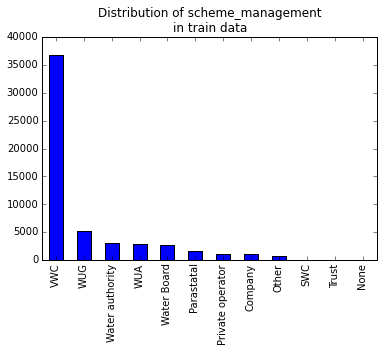

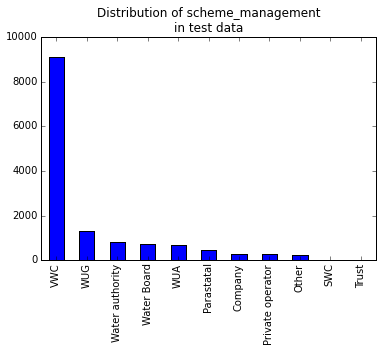

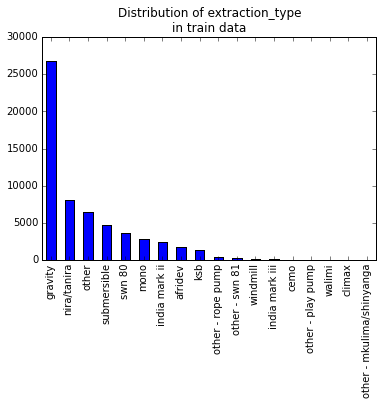

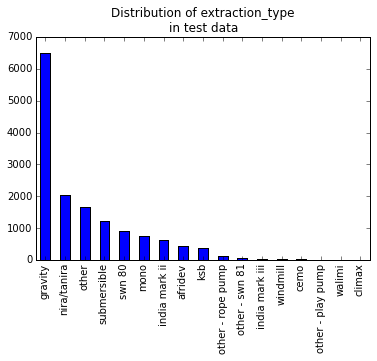

In [71]:
plt.show(water["scheme_management"].value_counts().plot(kind='bar', title="Distribution of scheme_management\nin train data"))
plt.show(watertest["scheme_management"].value_counts().plot(kind='bar', title="Distribution of scheme_management\nin test data"))
plt.show(water["extraction_type"].value_counts().plot(kind='bar', title="Distribution of extraction_type\nin train data"))
plt.show(watertest["extraction_type"].value_counts().plot(kind='bar', title="Distribution of extraction_type\nin test data"))

In [72]:
water["scheme_management"].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
dtype: int64

In [73]:
watertest["scheme_management"].value_counts()

VWC                 9124
WUG                 1290
Water authority      822
Water Board          714
WUA                  668
Parastatal           444
Company              280
Private operator     263
Other                230
SWC                   26
Trust                 20
dtype: int64

In [74]:
water["extraction_type"].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
dtype: int64

In [75]:
watertest["extraction_type"].value_counts()

gravity              6483
nira/tanira          2051
other                1672
submersible          1218
swn 80                918
mono                  763
india mark ii         629
afridev               438
ksb                   375
other - rope pump     121
other - swn 81         55
india mark iii         37
windmill               35
cemo                   18
other - play pump      16
walimi                 12
climax                  9
dtype: int64

In [76]:
water.scheme_management[water.scheme_management=='None'] = 'Other'
water.extraction_type[water.extraction_type=='other - mkulima/shinyanga'] = 'other'

C:\Users\rocket\Anaconda3\envs\py27\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\rocket\Anaconda3\envs\py27\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [78]:
#Other pre-processing worth considering:
#-taking care of missing values
#-balancing the data
#-addressing potential multicollinearity
#-feature reduction (feature extraction/selection)

In [79]:
water_ssf=pd.get_dummies(water)
water_ssf.head().T

,0,1,2,3,4
amount_tsh,6000.000000,0.000000,25.000000,0.000000,0.000000
gps_height,1390.000000,1399.000000,686.000000,263.000000,0.000000
longitude,34.938093,34.698766,37.460664,38.486161,31.130847
latitude,-9.856322,-2.147466,-3.821329,-11.155298,-1.825359
population,109.000000,280.000000,250.000000,58.000000,0.000000
days_frm_20131213,1005.000000,282.000000,291.000000,319.000000,884.000000
funder_0,0.000000,0.000000,0.000000,0.000000,0.000000
funder_Danida,0.000000,0.000000,0.000000,0.000000,0.000000
funder_Dhv,0.000000,0.000000,0.000000,0.000000,0.000000
funder_District Council,0.000000,0.000000,0.000000,0.000000,0.000000


In [110]:
watertest_ssf=pd.get_dummies(watertest)
watertest_ssf.head().T

,0,1,2,3,4
amount_tsh,0.000000,0.000000,0.000000,0.000000,500.000000
gps_height,1996.000000,1569.000000,1567.000000,267.000000,1260.000000
longitude,35.290799,36.656709,34.767863,38.058046,35.006123
latitude,-4.059696,-3.309214,-5.004344,-9.418672,-10.950412
population,321.000000,300.000000,500.000000,250.000000,60.000000
days_frm_20131213,312.000000,312.000000,315.000000,325.000000,261.000000
funder_0,0.000000,0.000000,0.000000,0.000000,0.000000
funder_Danida,0.000000,0.000000,0.000000,0.000000,0.000000
funder_Dhv,0.000000,0.000000,0.000000,0.000000,0.000000
funder_District Council,0.000000,0.000000,0.000000,0.000000,0.000000


In [80]:
cd C:/datasets

C:\datasets


In [81]:
#And here we see the correlation matrix for all variables
pd.set_option('display.max_columns', None)
corr_matrix=water_ssf.corr()
corr_matrix.to_csv("Water_Corr_Matrix.csv")

PCA

In [82]:
pca = decomposition.PCA()
water_records_trans = pca.fit_transform(water_ssf)

In [90]:
water_records_trans

array([[ -5.69522311e+03,   5.25653085e+02,   2.10840487e+02, ...,
         -7.53055161e-13,  -4.28989353e-13,   1.24449397e-12],
       [  3.04163680e+02,   7.87632951e+02,   1.29042555e+01, ...,
          4.61624281e-13,   4.82081365e-14,   6.30277171e-14],
       [  2.92581682e+02,   8.68334497e+01,  -8.19267732e+01, ...,
         -2.09245923e-12,  -2.45169462e-13,   2.77059163e-13],
       ..., 
       [  3.30053556e+02,  -7.30241092e+02,   7.75125349e+01, ...,
         -1.02242871e-13,  -1.06881767e-15,   8.22904054e-14],
       [  3.30001941e+02,  -7.35617811e+02,   7.91772956e+01, ...,
          6.59850622e-14,   1.46388223e-14,  -6.18683863e-14],
       [  3.26041909e+02,  -5.22545403e+02,  -3.56430183e+01, ...,
         -2.17914465e-14,  -9.39408000e-14,   2.27192325e-13]])

In [91]:
print(pca.explained_variance_ratio_)

[  9.17202771e-01   5.04619477e-02   2.19639014e-02   1.03648705e-02
   4.43271200e-06   6.70514958e-07   1.81272857e-07   9.06242788e-08
   7.89258316e-08   7.48742807e-08   6.19889767e-08   5.49606185e-08
   4.83745376e-08   4.47505076e-08   4.25536236e-08   3.39298025e-08
   3.09589376e-08   2.91453739e-08   2.50664591e-08   2.45333455e-08
   2.34059057e-08   2.30811779e-08   2.15556263e-08   2.02111488e-08
   1.92189193e-08   1.81526822e-08   1.72437289e-08   1.62741824e-08
   1.61412435e-08   1.52289313e-08   1.43689146e-08   1.34797637e-08
   1.33224731e-08   1.22101484e-08   1.15923411e-08   1.13037262e-08
   1.10790419e-08   1.05628867e-08   9.70679611e-09   9.34336079e-09
   8.93919988e-09   8.59930224e-09   8.36500465e-09   7.94409390e-09
   7.70732058e-09   7.46268564e-09   7.34446018e-09   6.98849546e-09
   6.64405397e-09   6.50450384e-09   6.32043993e-09   5.82899718e-09
   5.68446122e-09   5.44309993e-09   4.84047108e-09   4.80588289e-09
   4.69876905e-09   4.45449381e-09

In [92]:
#First four components account for >99% of the variability in our data. Hmm..

In [93]:
varPercentage=pca.explained_variance_ratio_

In [95]:
water_ssf.shape

(59400, 236)

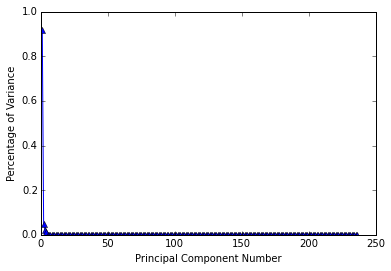

In [96]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1, 237), varPercentage, marker='^')
plt.xlabel('Principal Component Number')
plt.ylabel('Percentage of Variance')
plt.show()

In [111]:
#pca2 = decomposition.PCA(n_components=4)
#water_records_trans2 = pca2.fit_transform(water_ssf)
watertest_records_trans2 = pca2.transform(watertest_ssf)
print water_records_trans2
print water_records_trans2.shape
print watertest_records_trans2
print watertest_records_trans2.shape

[[-5695.22310707   525.65308529   210.84048726   451.79182199]
 [  304.16368038   787.63295107    12.90425547  -220.23902076]
 [  292.58168215    86.83344972   -81.92677324  -318.82039456]
 ..., 
 [  330.0535559   -730.24109234    77.51253492   237.86221095]
 [  330.00194058  -735.61781101    79.17729556   271.39028623]
 [  326.04190916  -522.54540345   -35.64301825   296.06136257]]
(59400L, 4L)
[[  292.83190291  1370.72260986    78.51272662   -99.56254213]
 [  300.88149138   951.65713905    24.45143622  -164.08068851]
 [  300.37102648   982.2939745   -172.42246436  -146.34472635]
 ..., 
 [  302.93656704   849.03586386   105.14325241  -212.93901369]
 [  311.99796443   373.3215279     71.36061729  -273.34010585]
 [  321.96646292  -148.84840019    89.31576832  -352.90451831]]
(14850L, 4L)


In [128]:
water_records_trans2_pd=pd.DataFrame(water_records_trans2, columns=['PC1', 'PC2', 'PC3', 'PC4'])
watertest_records_trans2_pd=pd.DataFrame(watertest_records_trans2, columns=['PC1', 'PC2', 'PC3', 'PC4'])

In [131]:
#write these files to csv
#cd C:/datasets
water.to_csv("water_train.csv",index=False)
watertest.to_csv("water_test.csv",index=False)
water_records_trans2_pd.to_csv("water_records_trans2.csv",index=False)
watertest_records_trans2_pd.to_csv("watertest_records_trans2.csv",index=False)

In [8]:
#water = train data
#watertest = test data
#water_target = train labels

In [ ]:
#drop variables
water = water.drop('id', 1)


In [30]:
#drop variables with too many levels, or those that are redundant
#water = water.drop('wpt_name', 1)
#water = water.drop('num_private',1)
#water = water.drop('subvillage',1)
#water = water.drop('region_code',1)
#water = water.drop('district_code',1)
#water = water.drop('lga',1)
#water = water.drop('ward',1)
#water = water.drop('recorded_by',1)
#water = water.drop('scheme_name',1)
water = water.drop('extraction_type',1)
water = water.drop('extraction_type_group',1)
water = water.drop('management_group',1)
water = water.drop('payment',1)
water = water.drop('water_quality',1)
water = water.drop('quantity',1)
water = water.drop('source',1)
water = water.drop('source_class',1)
water = water.drop('waterpoint_type',1)
water = water.drop('days_frm_20131213',1)
water = water.drop('Month_Recorded',1)

In [33]:
watertest = watertest.drop('extraction_type',1)
watertest = watertest.drop('extraction_type_group',1)
watertest = watertest.drop('management_group',1)
watertest = watertest.drop('payment',1)
watertest = watertest.drop('water_quality',1)
watertest = watertest.drop('quantity',1)
watertest = watertest.drop('source',1)
watertest = watertest.drop('source_class',1)
watertest = watertest.drop('waterpoint_type',1)
watertest = watertest.drop('days_frm_20131213',1)
watertest = watertest.drop('Month_Recorded',1)

In [36]:

cd C:/datasets

C:\datasets


In [37]:
#write these new files to csv
water.to_csv("water_train2.csv",index=False)
watertest.to_csv("water_test2.csv",index=False)
